In [2]:
## introduction to dataframes and pandas
import pandas as pd

df = pd.read_excel('/home/ilia/PycharmProjects/rbd_hw/data.xls')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,6.40,2.70,5.30,1.90,Iris-virginica
1,7.38,4.04,5.15,2.37,Iris-versicolor
2,5.00,3.40,1.60,0.40,Iris-setosa
3,6.12,3.19,5.90,2.01,Iris-virginica
4,6.78,3.47,6.13,2.29,Iris-virginica
...,...,...,...,...,...
2419,6.11,5.08,3.15,2.22,Iris-setosa
2420,7.17,6.07,4.30,1.78,Iris-setosa
2421,6.48,4.98,4.12,3.03,Iris-setosa
2422,6.73,4.71,3.67,2.90,Iris-setosa


In [92]:
df.info() ## з функції інфо ми можемо побачити та впевнетись що все колонки окрім колонки species
# є цифровими і далі можемо перейти до аналізу датафрейму методом describe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2424 entries, 0 to 2423
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  2415 non-null   float64
 1   sepal_width   2415 non-null   float64
 2   petal_length  2415 non-null   float64
 3   petal_width   2415 non-null   float64
 4   species       2424 non-null   object 
dtypes: float64(4), object(1)
memory usage: 94.8+ KB


In [90]:
df.describe()
##На описі ми можемо побачити що деякі значення по колонці sepal_length є від'ємними() за метрикою
# min, що в контексті датафрейму нереально.
## а інші колонки за цією метрикою мають мінімальне значення як 0, що також не має сенсу. Значит
# це наштовхує на думку, що в цих колонках є пропуски і їх потрібно заповнити або викинути. В
# нашому випадку завдання пропуски необхідно заповнити

,sepal_length,sepal_width,petal_length,petal_width
count,2415.000000,2415.000000,2415.000000,2415.000000
mean,6.470257,3.963540,4.616911,2.189752
std,2.140522,1.022686,1.987028,1.046936
min,-10.000000,0.000000,0.000000,0.000000
25%,5.950000,3.450000,2.780000,1.460000
50%,6.700000,4.000000,5.090000,2.240000
75%,7.490000,4.580000,6.150000,2.940000
max,10.490000,7.470000,9.040000,5.440000


In [89]:
df[df.isnull().any(axis=1)] #тут ми можемо перевірити що і справді в нашому датасеті є пропуски

,sepal_length,sepal_width,petal_length,petal_width,species
17,NaN,NaN,NaN,NaN,Iris-setosa
50,NaN,NaN,NaN,NaN,Iris-virginica
293,NaN,NaN,NaN,NaN,Iris-setosa
302,NaN,NaN,NaN,NaN,Iris-virginica
318,NaN,NaN,NaN,NaN,Iris-setosa
1179,NaN,NaN,NaN,NaN,Iris-virginica
1792,NaN,NaN,NaN,NaN,Iris-setosa
1808,NaN,NaN,NaN,NaN,Iris-setosa
1817,NaN,NaN,NaN,NaN,Iris-virginica


In [3]:
## Далі нам необхідно заповнити пусті колонки в діапазоні від 0-1000 методом середнього. Але в
# завданні не вказано це повинно бути середнє по всій множині чи по підмножині в ренджі від 0 до
# 1000. Але логічно що регресію ми будемо будувати по всьому датасету, тому візьмемо середнє
# значення з всієї множини

#Отримуємо індекси рядків де у нас присутні пропуски
df_0_1000 = df[0:1001]
empty_elements_from_0_1000_df = df_0_1000[df_0_1000.isnull().any(axis=1)]
empty_elements_0_1000_indexes = empty_elements_from_0_1000_df.index

#Отримуємо середні значення для кожної колонки по всьому датасету
sepal_length_mean_value=df['sepal_length'].mean()
sepal_width_mean_value=df['sepal_width'].mean() 
petal_length_mean_value=df['petal_length'].mean() 
petal_width_mean_value=df['petal_width'].mean() 

#По отриманим індексам пропусків заповнюємо їх отриманими середніми значенями
df.loc[empty_elements_0_1000_indexes, 'sepal_length'] = sepal_length_mean_value
df.loc[empty_elements_0_1000_indexes, 'sepal_width'] = sepal_width_mean_value
df.loc[empty_elements_0_1000_indexes, 'petal_length'] = petal_length_mean_value
df.loc[empty_elements_0_1000_indexes, 'petal_width'] = petal_width_mean_value

#Перевіряємо що в діапазоні від 0 до 1000 не має пропусків
df[0:1001][df[0:1001].isnull().any(axis=1)].__len__() == 0


True

In [6]:
#Заповнюємо пропуски  з 1001 елемента і до 2000 методом ffill
df[1001:2001].ffill(inplace=True)

#Перевіряємо що в діапазоні від 1001 до 2000 не має пропусків
df[1001:2001][df[1001:2001].isnull().any(axis=1)].__len__() == 0


/tmp/ipykernel_38351/1564547702.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[1001:2001].ffill(inplace=True)


True

In [11]:
#Заповнюємо пропуски  з 2001 елемента і до кінця методом bfill
df[2001:].bfill(inplace=True)

#Перевіряємо що в діапазоні від 2001 до кінця не має пропусків
df[2001:][df[2001:].isnull().any(axis=1)].__len__() == 0

/tmp/ipykernel_38351/75072184.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[2001:].bfill(inplace=True)


True

In [12]:
df.describe()
##Так як ми заповнювали тільки пропуски(з дивними даними як від'ємні числа нічого не робили)) і їх
# було не так багато. За описом можно відстежити що збільшилась загальна кількість записів в
# датасеті, по кожній колонці, тому що є припущення, що записи в колонці з Nan не враховуються при
# виклиці методу describe(). І збільшилась вона як раз на число рядків з пропусками. Також можно
# прослідкувати, що інші параметри не змінились. На мою думку це викликано тим, що ми пропуски
# заповнювали середніми та вже існуючими значеннями(метеоди bfill/ffill), тому це ніяк не
# посприяло на аналітику.

,sepal_length,sepal_width,petal_length,petal_width
count,2424.000000,2424.000000,2424.000000,2424.000000
mean,6.471011,3.963790,4.616933,2.189719
std,2.137122,1.020885,1.985475,1.045403
min,-10.000000,0.000000,0.000000,0.000000
25%,5.950000,3.450000,2.780000,1.460000
50%,6.700000,4.000000,5.090000,2.235000
75%,7.490000,4.580000,6.150000,2.940000
max,10.490000,7.470000,9.040000,5.440000


In [13]:
#В завданні не було вказано для якого саме ірису зробити передбачення petal_width, тому я обрав
# Iris-setosa
X = df[df.species == 'Iris-setosa'].drop(labels=['petal_width', 'species'], axis = 1)
Y = df[df.species == 'Iris-setosa']['petal_width']

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

In [14]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()

linear_regression.fit(X_train, Y_train)


LinearRegression()

In [15]:

linear_regression.predict(X_test)

array([ 1.32229066,  1.46122669,  1.03049967,  1.45323754,  1.80424788,
        0.78071668,  1.14079106,  1.44778044,  0.92030735,  1.8661598 ,
        0.76784794,  1.45613268, -0.43423951,  1.47891579,  1.45750928,
        1.75258425,  1.17584744,  1.29390295,  1.1805189 ,  1.66649175,
        1.27454044,  1.61190454,  0.88243195,  2.12479675,  1.42703371,
        1.01369761,  1.18336017,  1.16798378,  1.48940226, -0.43423951,
        0.9288978 ,  0.98551937,  1.18313511,  1.51706067,  2.17822416,
        1.23021353,  1.80746353,  1.97814696,  0.62616466,  0.85005549,
        0.94757045,  1.30232987,  1.49501832,  1.52652944,  1.28065546,
        1.17109572, -0.43423951,  1.46522971,  1.62037582,  1.16781478,
        0.75524189,  1.9653691 ,  0.72605442,  1.33954939,  1.90928125,
        1.55408234,  1.70828832,  1.61253108,  0.8778712 ,  1.08960574,
        1.34294551,  0.97559437,  1.22299403,  1.25174626,  1.64004624,
        0.94994096,  1.67616997,  0.77702112,  1.22329667,  1.25

In [16]:
Y_test
#При порівнянні данних, яких нам передбачила модель та данних які є насправді, можна відслідкувати
# дуже великі похибки в передбаченні. Тому щоб дослідити це питання, ми можемо візуалізувати
# графік залежності колонок від один одного

395     1.55
2092    2.19
888     0.44
1412    0.94
1624    2.43
        ... 
324     1.92
900     1.07
243     0.20
1536    2.00
2051    1.56
Name: petal_width, Length: 240, dtype: float64

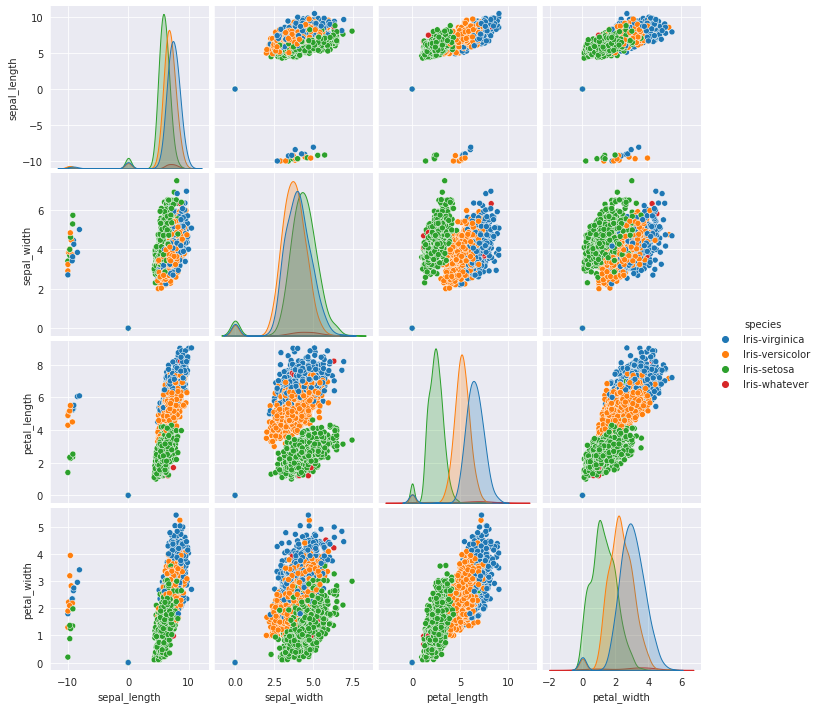

In [18]:
import seaborn as sns


sns.pairplot(df, hue='species')
#На графіку можна побачити, що для іриса сетоси при збільшенні petal_width не сильно збільшується
# інші параметри. Можливо sepal-width трішки просілдковується лінійна залежність. Але в цілому-
# ні. Тому мені здається, що лінійну регресію в данному випадку не є доречним використовувати, так
# як предікшн вийшов неточний, і на графіку візуально ми не можемо провести лінію збільшення
# одного та іншого прямопропорційно